# Fuel Consumption Prediction based on engine size

**By using Simple Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

**Data Reading**

In [3]:
data = pd.read_csv('Copy of Fuel Consumption Dataset - Fuel Consumption Dataset.csv')

In [4]:
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [5]:
data.tail()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
945,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


**Feature selection(Graph plotting)**

In [6]:
#Negative correlation when we take x=engine size(l) and y=Fuel Consumption(Comb (mpg))
x=data['Engine Size(L)']

In [7]:
y=data['Fuel Consumption(Comb (mpg))']

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Scatter plot by using Simple Linear Regreesion')

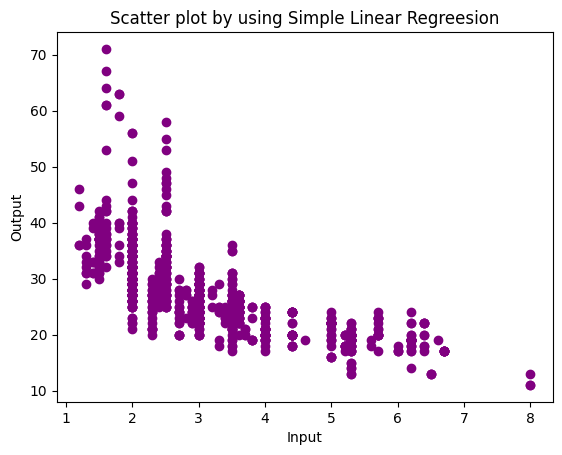

In [9]:
plt.scatter(x,y,color="purple")
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Scatter plot by using Simple Linear Regreesion")

In [10]:
data['Engine Size(L)'].corr(data['Fuel Consumption(Comb (mpg))'])

-0.7041625284953942

**Model building**

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()

In [13]:
x1=np.array(x).reshape(-1,1)
y1=np.array(y).reshape(-1,1)

In [14]:
model.fit(x1,y1)

LinearRegression()

In [15]:
#beta0
model.intercept_

array([39.83843018])

In [16]:
#beta1
model.coef_

array([[-3.93627064]])

In [17]:
Engine_Size=int(input("Enter engine size of your vehicle:"))

Enter engine size of your vehicle: 66


In [18]:
Fuel_consumption=39.83843018+(-3.93627064*Engine_Size)

In [19]:
Fuel_consumption

-219.95543206000002

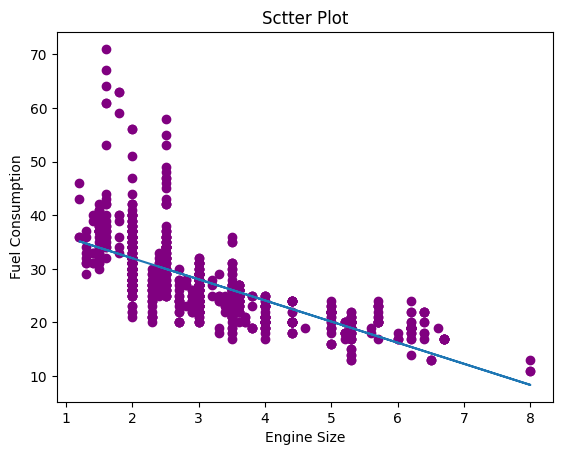

In [20]:
line=model.intercept_+model.coef_*x1
plt.scatter(data['Engine Size(L)'],data['Fuel Consumption(Comb (mpg))'],color='purple')
plt.xlabel("Engine Size")
plt.ylabel("Fuel Consumption")
plt.title("Sctter Plot")
plt.plot(x1,line)

In [21]:
data['Engine Size(L)'].corr(data['Fuel Consumption(Comb (mpg))'])

-0.7041625284953942

In [22]:
X=data['Engine Size(L)']
Y=data['Fuel Consumption(Comb (mpg))']
X.shape

(946,)

In [23]:
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)
print(X.shape,Y.shape)

(946, 1) (946, 1)


In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [32]:
regressor.fit(X,Y)

LinearRegression()

In [33]:
pickle.dump(regressor,open('model.pkl','wb'))

In [34]:
model=pickle.load(open('model.pkl','rb'))

In [35]:
print(model.predict([[3.5]]))

[[26.06148295]]
